# Pioneer Inshore
## Surface Mooring Surface Buoy pCO2 air-sea
### Atmospheric CO2 concentrations
*Copy of Rob's endurance python, except using Randy's data*
* note that flux is still uncertain

https://ooinet.oceanobservatories.org/data_access/?search=pCO2A

Download the data to your own account, get the emailed link, go to that link, search the catalog for what appears to be the most relevant dataset, OpenDAP. 


## Introduction
In this Python notebook, we will first load the necessary python libraries, define the website where you can get this data, then get atmospheric CO2 data from the PIONEER inshore location. 

In [2]:
import xarray as xr
!pip install netcdf4==1.5.0
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import os
import re
sns.set()

     |████████████████████████████████| 3.9MB 5.0MB/s 
     |████████████████████████████████| 307kB 42.5MB/s 


In [0]:
# This was Randy Reeds first file that worked
single_file  = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
# This is the URL received by email linking to the catalog of ALL of the deployments for this particular site.  
url_Pioneer_Inshore_CO2 = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'

In [0]:
# This came from Sage's github: a function that combines multiple datasets
# https://github.com/ooi-data-lab/data-lab-workshops/blob/master/June2019/Activities/DL_June_Air_Sea_v1.ipynb

import pprint as pp
def get_data(url,bad_inst=''):
  '''Function to grab all data from specified directory'''
  tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
  datasets = requests.get(url).text
  urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
  x = re.findall(r'(ooi/.*?.nc)', datasets)
  for i in x:
    if i.endswith('.nc') == False:
      x.remove(i)
  for i in x:
    try:
      float(i[-4])
    except:
      x.remove(i)
  datasets = [os.path.join(tds_url, i) for i in x]
  
  # Remove extraneous files if necessary
  selected_datasets = []
  for d in datasets:
    if (bad_inst) and bad_inst in d:
      pass
    elif 'ENG000' in d:     #Remove engineering streams for gliders -- not relevant for this site, but relevant for others
      pass
    elif 'water_recovered' in d:  #Remove water files, as data are in the air_recovered files
      pass
    elif 'METBK' in d:     #Remove files that have MET in the name
      pass
    else:
      selected_datasets.append(d)
  
 #  selected_datasets = selected_datasets[0:5]
  pp.pprint(selected_datasets)
  
  # Load in dataset
  ds = xr.open_mfdataset(selected_datasets)
  ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
  # ds = ds.chunk({'time': 100}) # Used for optimization
  ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
  return ds

In [12]:
# Now get the list of datasets using the function 'data_co2'
data_co2 = get_data(url_Pioneer_Inshore_CO2,'VELPT')

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180319T005549.183000-20180328T145530.750000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180219T005643.464000-20180318T235549.432000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180122T005737.706000-20180218T235643.882000.nc',
 'https://ope

In [0]:
# SELECT THE DATASETS YOU WANT.  Warning: The next attempt to load multiple ones of these datasets doesn't work for some reason
selected_datasets= ['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180319T005549.183000-20180328T145530.750000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180219T005643.464000-20180318T235549.432000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20180122T005737.706000-20180218T235643.882000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171225T005833.547000-20180121T235738.135000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171208T165906.595000-20171224T235833.969000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0007_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171101T130021.068000-20171113T005958.689000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171030T005732.630000-20171101T125730.924000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20171002T005756.531000-20171029T235732.996000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170904T005818.700000-20171001T235756.904000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170807T005838.304000-20170903T235819.067000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170710T005858.393000-20170806T235838.673000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0006_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170615T135919.170000-20170709T235858.412000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170612T002040.470000-20170615T022034.882000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170515T002134.535000-20170611T232040.887000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170417T002228.840000-20170514T232134.953000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170320T002322.566000-20170416T232229.257000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170220T002416.448000-20170319T232322.978000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20170123T002510.788000-20170219T232416.876000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161226T002606.236000-20170122T232511.206000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161128T002700.597000-20161225T232606.656000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161031T002753.870000-20161127T232701.014000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0005_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161011T142829.274000-20161030T232754.284000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20161003T001819.414000-20161015T114755.394000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160905T001933.137000-20161002T234819.609000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160808T002003.503000-20160904T234913.407000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160711T002053.366000-20160807T235003.709000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160613T002208.032000-20160710T235053.575000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0004_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160528T145219.248000-20160612T235148.307000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160418T002707.203000-20160514T112641.348000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160321T002734.802000-20160417T235707.399000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160222T002802.584000-20160320T235734.989000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20160125T002830.349000-20160221T235802.784000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20151228T002857.086000-20160124T235830.547000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20151130T002922.554000-20151227T235856.938000.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/rreed@shastacollege.edu/20190725T181930381Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/deployment0003_CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered_20151102T002946.010000-20151129T235943.863000.nc']
 

In [21]:
# DON'T RUN THIS UNTIL YOU GET MULTIPLE FILES
# Load in multiple datasets - here we only picked a couple from above.  keep trying till it don't work. 
ds = xr.open_mfdataset(selected_datasets,compat='no_conflicts')
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
# ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
df = ds.to_dataframe() #And convert to a Pandas DataFrame 
print('Dataset has %d points' % df.index.size)


Dataset has 189393 points


In [0]:
# HERE WE WILL load a single data file instead, using "single_file"
ds = xr.open_dataset(single_file)
ds = ds.swap_dims({'obs': 'time'}) #Swap dimensions
df = ds.to_dataframe() #And convert to a Pandas DataFrame
print('Dataset has %d points' % df.index.size)

In [7]:
ds['met_relwind_speed'].comment

NameError: ignored

In [19]:
ds['met_relwind_speed']

<xarray.DataArray 'met_relwind_speed' (time: 189393)>
dask.array<shape=(189393,), dtype=float64, chunksize=(6720,)>
Coordinates:
    obs      (time) int64 0 1 2 3 4 5 6 7 ... 2072 2073 2074 2075 2076 2077 2078
  * time     (time) datetime64[ns] 2015-11-02T00:29:46.010000384 ... 2018-03-28T14:55:30.750000128
    lat      (time) float64 dask.array<shape=(189393,), chunksize=(6720,)>
    lon      (time) float64 dask.array<shape=(189393,), chunksize=(6720,)>
Attributes:
    comment:                  RELWIND_SPD-AUX, the magnitude of the vector di...
    data_product_identifier:  RELWIND_SPD-AUX
    long_name:                Relative Wind Speed
    units:                    m s-1
    precision:                4
    instrument:               CP03ISSM-SBD11-06-METBKA000
    stream:                   metbk_a_dcl_instrument_recovered

In [22]:
# Display the first few rows of the dataframe, to get the header names!
df.head(100)

,obs,deployment,id,avg_irga_temperature,current_a2d,date_time_string,dcl_controller_timestamp,driver_timestamp,gas_stream_pressure,humidity,humidity_temperature,ingestion_timestamp,internal_timestamp,irga_detector_temperature,irga_source_temperature,measured_air_co2,port_timestamp,preferred_timestamp,zero_a2d,partial_pressure_co2_atm,partial_pressure_co2_ssw,met_salsurf,sea_surface_temperature,met_wind10m,pco2_co2flux,precipitation,relative_humidity,shortwave_irradiance,air_temperature,longwave_irradiance,met_relwind_speed,barometric_pressure,measured_air_co2_qc_executed,measured_air_co2_qc_results,partial_pressure_co2_atm_qc_executed,partial_pressure_co2_atm_qc_results,pco2_co2flux_qc_executed,pco2_co2flux_qc_results,lat,lon
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-11-02 00:29:46.010000384,0,3,b'ef877eae-9acf-4996-a651-71d776e92b79',40.500000,41531.0,b'empty',b'empty',2017-10-24 03:12:35.955588096,1019.0,17.737000,27.160000,2017-10-24 03:12:38.715000320,2015-11-02 00:23:36,40.200001,40.799999,403.079987,2015-11-02 00:29:46.010000384,b'port_timestamp',44336.0,405.367382,380.915788,34.698209,17.707035,NaN,NaN,7.180567,85.279908,0.801134,17.044601,350.124948,NaN,1013.429993,21.0,21.0,29.0,29.0,29.0,12.0,40.36472,-70.88837
2015-11-02 00:29:46.053000192,1,3,b'9345d3ce-133d-4a32-9c31-53845b5ff09e',40.500000,41530.0,b'empty',b'empty',2017-10-24 03:12:35.955720704,1019.0,17.737000,27.160000,2017-10-24 03:12:38.716000256,2015-11-02 00:23:38,40.200001,40.900002,403.070007,2015-11-02 00:29:46.053000192,b'port_timestamp',44336.0,405.357359,380.915747,34.698211,17.707037,NaN,NaN,7.180600,85.279903,0.801200,17.044637,350.126401,NaN,1013.429993,21.0,21.0,29.0,29.0,29.0,12.0,40.36472,-70.88837
2015-11-02 00:29:46.095000064,2,3,b'6b6b6bad-f810-4198-b5f9-543472fd0a32',40.500000,41530.0,b'empty',b'empty',2017-10-24 03:12:35.955824640,1019.0,17.781000,27.200001,2017-10-24 03:12:38.716000256,2015-11-02 00:23:40,40.200001,40.900002,403.070007,2015-11-02 00:29:46.095000064,b'port_timestamp',44336.0,405.357359,380.915707,34.698213,17.707039,NaN,NaN,7.180632,85.279898,0.801264,17.044671,350.127821,NaN,1013.429993,21.0,21.0,29.0,29.0,29.0,12.0,40.36472,-70.88837
2015-11-02 00:29:46.136999936,3,3,b'cd2f8d25-fbdf-4c50-927c-b75b200baf9a',40.500000,41530.0,b'empty',b'empty',2017-10-24 03:12:35.955916800,1019.0,17.781000,27.200001,2017-10-24 03:12:38.716000256,2015-11-02 00:23:41,40.200001,40.799999,403.079987,2015-11-02 00:29:46.136999936,b'port_timestamp',44336.0,405.367382,380.915667,34.698215,17.707041,NaN,NaN,7.180664,85.279893,0.801329,17.044705,350.129240,NaN,1013.429993,21.0,21.0,29.0,29.0,29.0,12.0,40.36472,-70.88837
2015-11-02 00:29:46.178999808,4,3,b'15354250-9049-4210-acb6-0d56882c8a01',40.500000,41530.0,b'empty',b'empty',2017-10-24 03:12:35.956034560,1019.0,17.781000,27.200001,2017-10-24 03:12:38.716000256,2015-11-02 00:23:43,40.200001,40.900002,403.079987,2015-11-02 00:29:46.178999808,b'port_timestamp',44336.0,405.367382,380.915627,34.698218,17.707043,NaN,NaN,7.180697,85.279887,0.801393,17.044739,350.130659,NaN,1013.429993,21.0,21.0,29.0,29.0,29.0,12.0,40.36472,-70.88837
2015-11-02 00:59:45.994999808,5,3,b'1e8515d1-8ea3-488e-8f6a-4ba1bd5ce271',40.500000,41527.0,b'empty',b'empty',2017-10-24 03:12:35.957388800,1019.0,17.781000,27.200001,2017-10-24 03:12:38.717000192,2015-11-02 00:53:36,40.200001,40.900002,403.369995,2015-11-02 00:59:45.994999808,b'port_timestamp',44336.0,405.659049,379.126986,34.746839,17.795652,NaN,NaN,7.176131,85.349616,0.687738,17.025158,346.452861,NaN,1013.682844,21.0,21.0,29.0,29.0,29.0,12.0,40.36472,-70.88837
2015-11-02 00:59:46.036999680,6,3,b'5366353d-09a2-454c-82eb-f70e330c6860',40.500000,41526.0,b'empty',b'empty',2017-10-24 03:12:35.957532160,1019.0,17.549999,27.160000,2017-10-24 03:12:38.717000192,2015-11-02 00:53:38,40.200001,41.000000,403.429993,2015-11-02 00:59:46.036999680,b'port_timestamp',44336.0,405.719375,379.127023,34.746842,17.795659,NaN,NaN,7.176098,85.348755,0.687803,17.025099,346.453644,NaN,1013

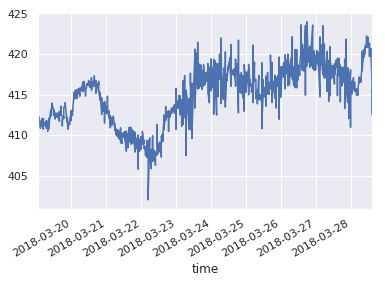

In [8]:
#  df.measured_air_co2.plot();   Not sure why this is slightly different from the partial pressure
df.partial_pressure_co2_atm.plot();  

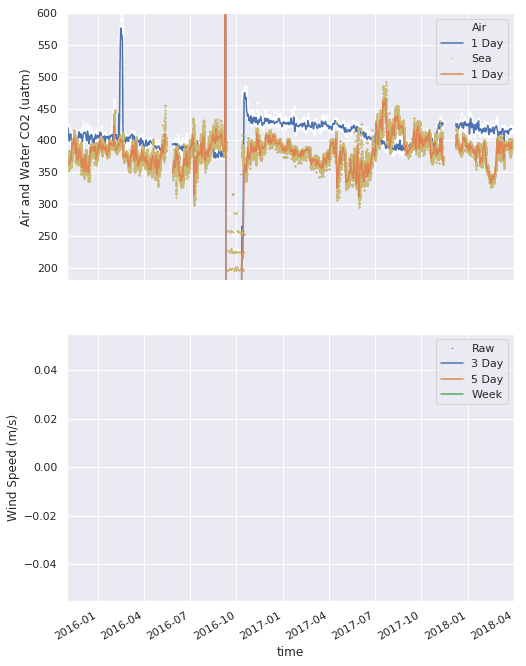

In [23]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize = (8,12))
# fig.set_size_inches(12, 6)
df['partial_pressure_co2_atm'].plot(ax=ax1,label='Air',linestyle='None',marker='.',markersize=1,color='w');
df['partial_pressure_co2_atm'].resample('D').mean().plot(ax=ax1,label='1 Day')

df['partial_pressure_co2_ssw'].plot(ax=ax1,label='Sea',linestyle='None',marker='.',markersize=1,color='y')
df['partial_pressure_co2_ssw'].resample('D').mean().plot(ax=ax1,label='1 Day')
ax1.set_ylim([180,600])
ax1.set_ylabel('Air and Water CO2 (uatm)')
ax1.legend();

df['met_wind10m'].plot(ax=ax2,label='Raw',linestyle='None',marker='.',markersize=0.5,color='k')
df['met_wind10m'].resample('4D').mean().plot(ax=ax2,label='3 Day')
df['met_wind10m'].resample('5D').mean().plot(ax=ax2,label='5 Day')
df['met_wind10m'].resample('W').mean().plot(ax=ax2,label='Week')

#ax2.set_ylim([2.5,10])
ax2.set_ylabel('Wind Speed (m/s)')
plt.legend();


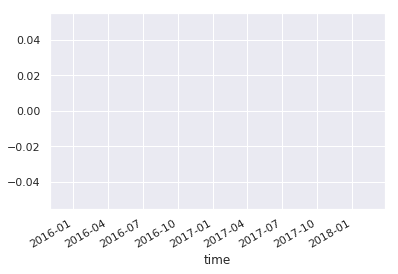

In [24]:
#   function [F_CO2, dpCO2]=FCO2(pCO2_agua, pCO2_atm,T,S,u)
#   pCO2_agua= seawater pCO2 (uatm)
#    %pCO2_atm=  atmospheric pCO2 (uatm)
#    %T=  Temperature (Celsius)
#    %S=  Salinity 
#    %u = Wind speed (m/s)   
#    %Air-sea CO2 is calculated as follows:
#    FCO2 =K*a(dpCO2) 
#     %Where
#     %K=is the transfer velocity according to Wanninkhof (1992).
#     %a = CO2 solibility constant according to Weiss (1974)
#     %dpCO2 is the difference of air and seawater pCO2 
    
    
#     %%%%% CO2 Transfer velocity calculation %%%%%%%%%
#  ******** Schmidt Number*********
# Compute Schmidt number (after Wanninkhof, 1992, Table A1)
#  For water of salinity=35 and temperature range 0-30C    %%%%%%%%%%%%%    
A = 2073.1;     
B = 125.62;     
C = 3.6276;     
D = 0.043219;
T = df['sea_surface_temperature']    
S = 34
# Schmidt= A - (B.*T)+(C.*T.^2)-(D.*T.^3) 
Schmidt= A - (B*T)+(C*T**2)-(D*T**3)    

u = df['met_relwind_speed']

# DOUBLE CHECK THESE CALCULATIONS:  THERE MAY BE A BIG MISTAKE WITH K!!!
#if u<=6;    
# Compute gas transfer velocity (after Sweeney et al. 2007, Fig. 3 and Table 1)
K = 0.27 * u**2 * np.sqrt(660.0 / Schmidt)

#  K=0.31*(u**2)*((Schmidt/660)**-0.5); # for slower steadier wind
 
    
#   else    
#  K=0.39*(u.^2).*((Schmidt./660).^-0.5);
#  end
# calculation of delta pCO2

# df['new_partial_pressure_co2_atm']= df['partial_pressure_co2_atm']-100
dpCO2=df['partial_pressure_co2_ssw'] - df['partial_pressure_co2_atm'];  

AA=[-60.2409, 93.4517, 23.3585];  # mol/Kg.atm
BB=[0.023517, -0.023656, 0.0047036]; # mol/Kg.atm
T=T+273.15; #  Conversio from Celsius degrees to Kelvins
#T=T+293.15; #  Conversio from Celsius degrees to Kelvins
# Ln_Ko=AA(1)+(AA(2).*(100./T))+(AA(3).*log(T./100))+S.*(BB(1)+(BB(2).*(T./100))+(BB(3).*(T./100).^2));
Ln_Ko=AA[0]+(AA[1]*(100/T))+(AA[2]*np.log(T/100))+S*(BB[0]+(BB[1]*(T/100))+(BB[2]*(T/100)**2));
Ko=np.exp(Ln_Ko)
a=Ko     #  Solibility in mmol L^-1 atm^-1 or mmol m^-3 uatm^-1    
F_CO2 =0.24*K*a*dpCO2; #  CO2 flux (mmol m^-2 d^-1)
F_CO2 =0.24*K*a*dpCO2; #  CO2 flux (mmol m^-2 d^-1)
F_CO2.head()
F_CO2.plot();

In [25]:
F_CO2.index


DatetimeIndex(['2015-11-02 00:29:46.010000384',
               '2015-11-02 00:29:46.053000192',
               '2015-11-02 00:29:46.095000064',
               '2015-11-02 00:29:46.136999936',
               '2015-11-02 00:29:46.178999808',
               '2015-11-02 00:59:45.994999808',
               '2015-11-02 00:59:46.036999680',
               '2015-11-02 00:59:46.079000064',
               '2015-11-02 00:59:46.121000448',
               '2015-11-02 00:59:46.163000320',
               ...
               '2018-03-28 13:55:30.840999936',
               '2018-03-28 14:55:30.413000192',
               '2018-03-28 14:55:30.455000064',
               '2018-03-28 14:55:30.498000384',
               '2018-03-28 14:55:30.539999744',
               '2018-03-28 14:55:30.581999616',
                  '2018-03-28 14:55:30.624000',
               '2018-03-28 14:55:30.666999808',
               '2018-03-28 14:55:30.710000128',
               '2018-03-28 14:55:30.750000128'],
              dtype=

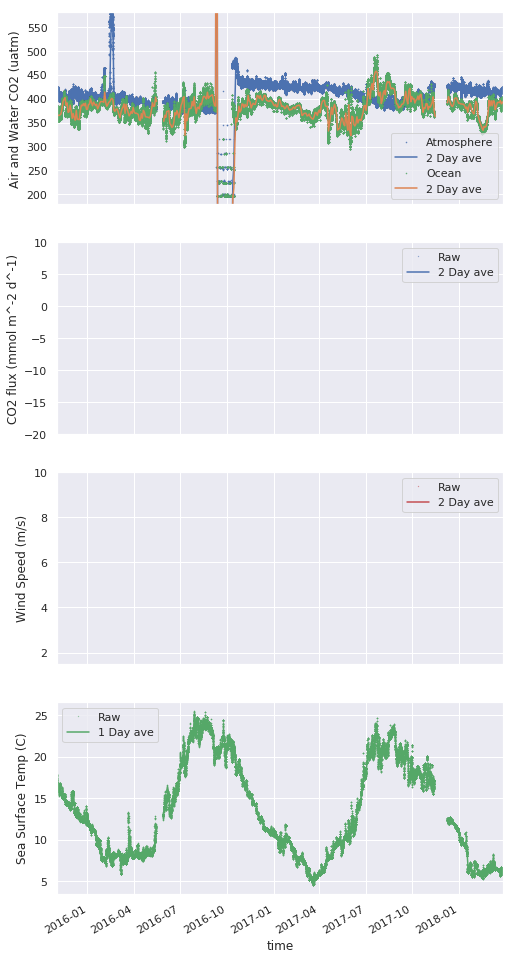

In [27]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize = (8,18))
# fig.set_size_inches(12, 6)
avgdays = 4       # WHAT'S YOUR AVERAGING WINDOW?
halfavg = avgdays/2

# FIGURE 1 = CO2 in ATMOSPHERE AND OCEANS
df['partial_pressure_co2_atm'].plot(ax=ax1,label='Atmosphere',linestyle='None',marker='.',markersize=1,color='b');
#df['partial_pressure_co2_atm'].resample('4D').mean().plot(ax=ax1,label='4 Day')
dfa = df['partial_pressure_co2_atm'].tshift(1,freq='2D')   #  shift ahead by 0.5 days
dfa.resample('2D').mean().plot(ax=ax1,label='2 Day ave')

df['partial_pressure_co2_ssw'].plot(ax=ax1,label='Ocean',linestyle='None',marker='.',markersize=1,color='g')
#df['partial_pressure_co2_ssw'].resample('4D').mean().plot(ax=ax1,label='4 Day')
dfw = df['partial_pressure_co2_ssw'].tshift(1,freq='2D')   #  shift ahead by 0.5 days
dfw.resample('2D').mean().plot(ax=ax1,label='2 Day ave')
dfw.tail()
ax1.set_ylim([180,580])
ax1.set_ylabel('Air and Water CO2 (uatm)')
ax1.legend();

# FIGURE 2 = CO2 FLUX
F_CO2.plot(ax=ax2,label='Raw',linestyle='None',marker='.',markersize=0.5,color='b')
#F_CO2.resample('4D').mean().plot(ax=ax2,label='4 Day')
shiftedco2 = F_CO2.tshift(1,freq='2D')   #  shift ahead by 1 days
shiftedco2.resample('2D').mean().plot(ax=ax2,label='2 Day ave')
ax2.set_ylim([-20,10])
ax2.set_ylabel('CO2 flux (mmol m^-2 d^-1)')
ax2.legend();

# FIGURE 3 = WIND SPEED
df['met_relwind_speed'].plot(ax=ax3,label='Raw',linestyle='None',marker='.',markersize=0.5,color='r')
#df['met_relwind_speed'].resample('4D').mean().plot(ax=ax3,label='4 Day')
dfwind = df['met_relwind_speed'].tshift(1,freq='2D')   #  shift ahead by 0.5 days
dfwind.resample('2D').mean().plot(ax=ax3,label='2 Day ave',color='r')
ax3.set_ylabel('Wind Speed (m/s)')
ax3.legend();
ax3.set_ylim([1.5,10])

# FIGURE 4 = SEA SURFACE TEMP
df['sea_surface_temperature'].plot(ax=ax4,label='Raw',linestyle='None',marker='.',markersize=0.5,color='g')
#df['sea_surface_temperature'].resample('4D').mean().plot(ax=ax4,label='4 Day')
dfsst = df['sea_surface_temperature'].tshift(1,freq='2D')   #  shift ahead by 0.5 days
dfsst.resample('2D').mean().plot(ax=ax4,label='1 Day ave',color='g')
ax4.set_ylabel('Sea Surface Temp (C)')
ax4.legend();
# ax4.set_ylim([1.5,12])
# plt.title('Washington Shelf');
plt.savefig('savedfigure.png')